# ML Classifier Copies (v0)

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, accuracy_score
from sklearn.datasets import make_blobs, make_moons

## Original datasets
### Blobs

(-2.5, 3.5)

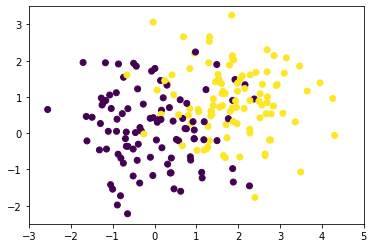

In [2]:
Xb, yb = make_blobs(n_samples=200, centers=[(0,0), (2,1)], n_features=2, random_state=0)
plt.scatter(Xb[:,0],Xb[:,1], c=yb)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

### Moons

(-2.5, 3.5)

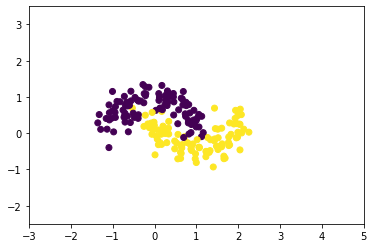

In [3]:
Xm, ym = make_moons(n_samples=200, noise=0.2, random_state=0)
plt.scatter(Xm[:,0],Xm[:,1], c=ym)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

## Fit classifier
### Blobs


Score of trained SVC classifier: 0.8

Classification report: 

               precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



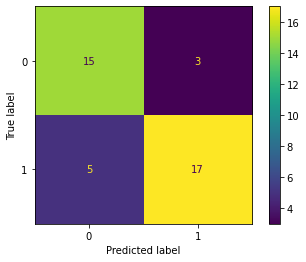

In [4]:
# Train/test split
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(Xb, yb, test_size=0.20, random_state=0)

# SVC classifier
classifier_blobs = SVC(kernel='linear', decision_function_shape='ovo')
classifier_blobs.fit(X_train_blobs, y_train_blobs)
y_predicted_blobs = classifier_blobs.predict(X_test_blobs)

score = classifier_blobs.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_blobs, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted_blobs))

### Moons


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



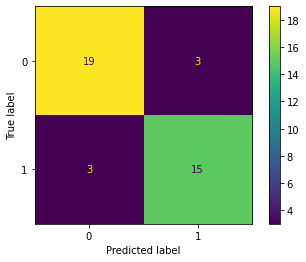

In [5]:
# Train/test split
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(Xm, ym, test_size=0.20, random_state=0)

# SVC classifier
classifier_moons = SVC(kernel='linear', decision_function_shape='ovo')
classifier_moons.fit(X_train_moons, y_train_moons)
y_predicted_moons = classifier_moons.predict(X_test_moons)

score = classifier_moons.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_moons, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted_moons))

## Feature dynamical ranges

In [6]:
print("Blobs dataset:")
print(f"X min: {Xb[:,0].min():.4f}   X max: {Xb[:,0].max():.4f}    Interval: {Xb[:,0].max()- Xb[:,0].min():.4f}")
print(f"Y min: {Xb[:,1].min():.4f}   Y max: {Xb[:,1].max():.4f}    Interval: {Xb[:,1].max()- Xb[:,1].min():.4f}")

print("\nMoons dataset:")
print(f"X min: {Xm[:,0].min():.4f}   X max: {Xm[:,0].max():.4f}    Interval: {Xm[:,0].max()- Xm[:,0].min():.4f}")
print(f"Y min: {Xm[:,1].min():.4f}   Y max: {Xm[:,1].max():.4f}    Interval: {Xm[:,1].max()- Xm[:,1].min():.4f}")

Blobs dataset:
X min: -2.5530   X max: 4.3039    Interval: 6.8569
Y min: -2.2234   Y max: 3.2567    Interval: 5.4801

Moons dataset:
X min: -1.3546   X max: 2.2554    Interval: 3.6100
Y min: -0.9321   Y max: 1.3416    Interval: 2.2737


## Generate distribution
###  Grid-like uniform 

In [7]:
# Blobs dataset
X0_generated_gb = np.linspace(Xb[:,0].min(), Xb[:,0].max(), 12)
X1_generated_gb = np.linspace(Xb[:,1].min(), Xb[:,1].max(), 16)
X_generated_gb = np.array(np.meshgrid(X0_generated_gb, X1_generated_gb)).T.reshape(-1, 2)

# Moons dataset
X0_generated_gm = np.linspace(Xm[:,0].min(), Xm[:,0].max(), 12)
X1_generated_gm = np.linspace(Xm[:,1].min(), Xm[:,1].max(), 16)
X_generated_gm = np.array(np.meshgrid(X0_generated_gm, X1_generated_gm)).T.reshape(-1, 2)

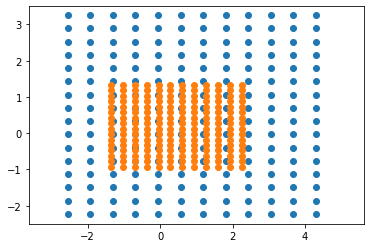

In [8]:
plt.scatter(X_generated_gb[:,0], X_generated_gb[:,1])
plt.scatter(X_generated_gm[:,0], X_generated_gm[:,1])
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

### Random uniform
We generate 2 sets of uniform random data because the dynamic range of the features is different in each case.

In [9]:
# Blobs datasetfrom matplotlib import cm
X0_generated_ub = np.random.uniform(low=Xb[:,0].min(), high=Xb[:,0].max(), size=200)
X1_generated_ub = np.random.uniform(low=Xb[:,1].min(), high=Xb[:,1].max(), size=200)
X_generated_ub = np.stack((X0_generated_ub, X1_generated_ub), axis=1)

# Moons dataset
X0_generated_um = np.random.uniform(low=Xm[:,0].min(), high=Xm[:,0].max(), size=200)
X1_generated_um = np.random.uniform(low=Xm[:,1].min(), high=Xm[:,1].max(), size=200)
X_generated_um = np.stack((X0_generated_um, X1_generated_um), axis=1)

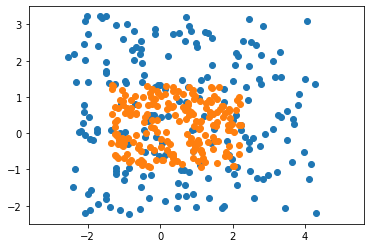

In [10]:
plt.scatter(X0_generated_ub, X1_generated_ub)
plt.scatter(X0_generated_um, X1_generated_um)
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

### Normal distribution

In [11]:
# Blobs dataset
mean_b = [Xb[:,0].min()+(Xb[:,0].max()-Xb[:,0].min())/2, 
          Xb[:,1].min()+(Xb[:,1].max()-Xb[:,1].min())/2]
cov_b = [[0.2*(Xb[:,0].max()-Xb[:,0].min()), 0], 
         [0, 0.2*(Xb[:,1].max()-Xb[:,1].min())]] 
X0_generated_nb, X1_generated_nb = np.random.multivariate_normal(mean_b, cov_b, 200).T
X_generated_nb = np.stack((X0_generated_nb, X1_generated_nb), axis=1)

# Moons dataset
mean_m = [Xm[:,0].min()+(Xm[:,0].max()-Xm[:,0].min())/2, 
          Xm[:,1].min()+(Xm[:,1].max()-Xm[:,1].min())/2]
cov_m = [[0.2*(Xm[:,0].max()-Xm[:,0].min()), 0], 
         [0,0.2*(Xm[:,1].max()-Xm[:,1].min())]   ]
X0_generated_nm, X1_generated_nm = np.random.multivariate_normal(mean_m, cov_m, 200).T
X_generated_nm = np.stack((X0_generated_nm, X1_generated_nm), axis=1)

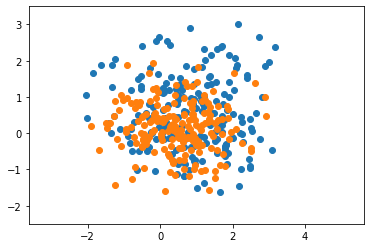

In [12]:
plt.scatter(X0_generated_nb, X1_generated_nb)
plt.scatter(X0_generated_nm, X1_generated_nm)
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

## Label synthetic data with original classifier

In [13]:
# Grid-like uniform
y_generated_gb = classifier_blobs.predict(X_generated_gb)
y_generated_gm = classifier_moons.predict(X_generated_gm)

# Random uniform
y_generated_ub = classifier_blobs.predict(X_generated_ub)
y_generated_um = classifier_moons.predict(X_generated_um)

# Normal distribution
y_generated_nb = classifier_blobs.predict(X_generated_nb)
y_generated_nm = classifier_moons.predict(X_generated_nm)

----

## Copy classifier with synthetic data

### Blobs SVC classifier + grid-like synthetic data

In [14]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_gb, y_generated_gb, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

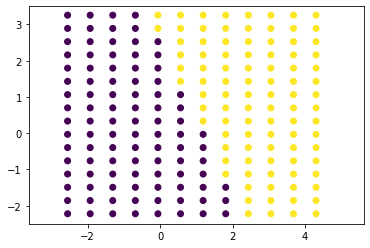

In [15]:
plt.scatter(X_generated_gb[:,0], X_generated_gb[:,1], c=y_generated_gb )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        20

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



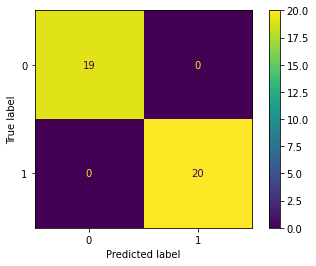

In [16]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.82

Classification report: 

               precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.86      0.82      0.84        22

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



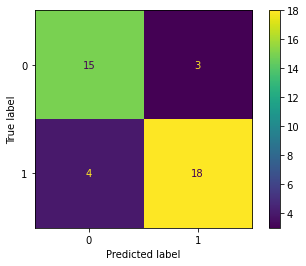

In [17]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [18]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0250


----
### Blobs SVC classifier + random uniform synthetic data

In [19]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_ub, y_generated_ub, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

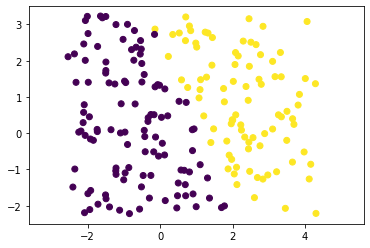

In [20]:
plt.scatter(X_generated_ub[:,0], X_generated_ub[:,1], c=y_generated_ub )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



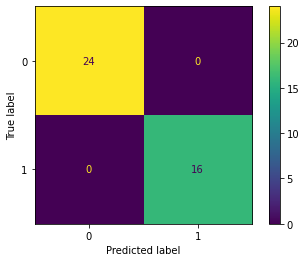

In [21]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.82

Classification report: 

               precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.86      0.82      0.84        22

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



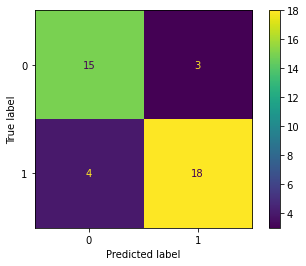

In [22]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [23]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0250


-----
### Blobs SVC classifier + normally distributed synthetic data

In [24]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_nb, y_generated_nb, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

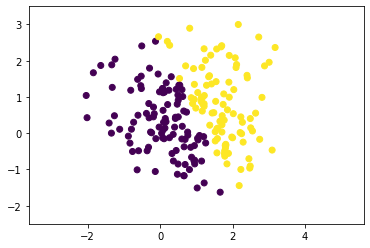

In [25]:
plt.scatter(X_generated_nb[:,0], X_generated_nb[:,1], c=y_generated_nb )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



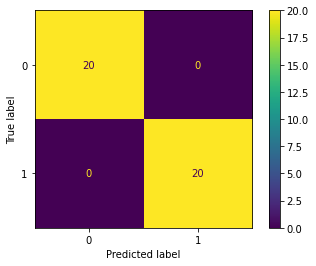

In [26]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.80

Classification report: 

               precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



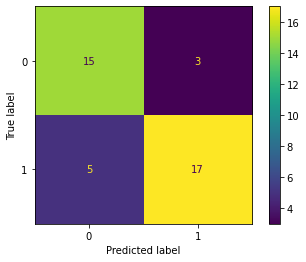

In [27]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [28]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0000


-----
### Moons SVC classifier + grid-like synthetic data

In [29]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_gm, y_generated_gm, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

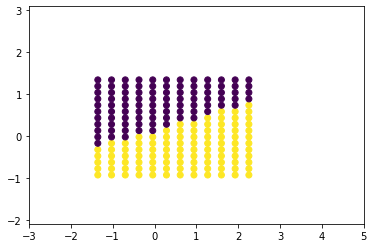

In [30]:
plt.scatter(X_generated_gm[:,0], X_generated_gm[:,1], c=y_generated_gm )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.97

Classification report: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        20

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



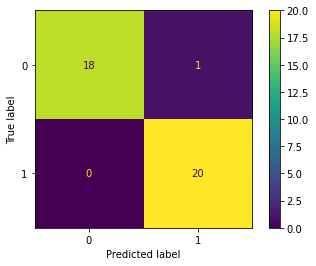

In [31]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



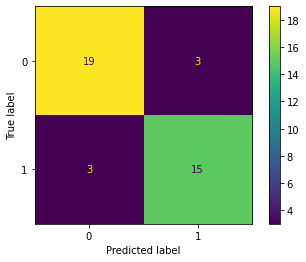

In [32]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [33]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0256
Original dataset:  0.0000


-----
### Moons SVC classifier + random uniform synthetic data

In [34]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_um, y_generated_um, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

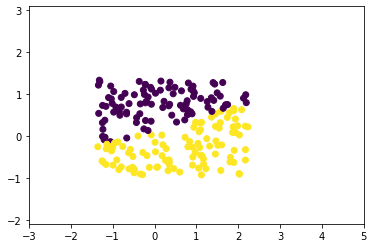

In [35]:
plt.scatter(X_generated_um[:,0], X_generated_um[:,1], c=y_generated_um )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.97

Classification report: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



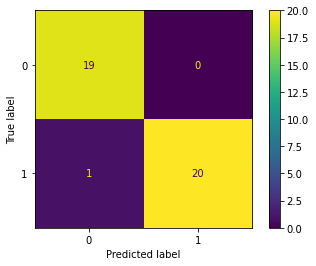

In [36]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



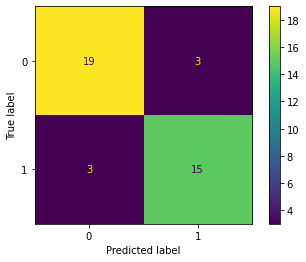

In [37]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [38]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0250
Original dataset:  0.0000


-----
### Moons SVC classifier + normally distributed synthetic data

In [39]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_nm, y_generated_nm, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

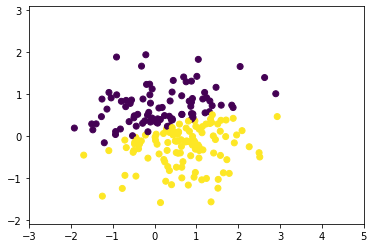

In [40]:
plt.scatter(X_generated_nm[:,0], X_generated_nm[:,1], c=y_generated_nm )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.95

Classification report: 

               precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.90      1.00      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



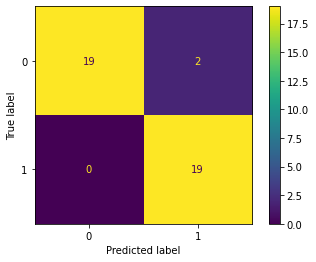

In [41]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



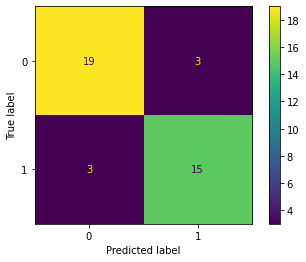

In [42]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [43]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0500
Original dataset:  0.0000


--------